# Второе задание по вычислительной математике. Решение ОДУ и их систем

In [342]:
# Подключаем заклинания
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sympy import diff, symbols, Symbol, integrate, solve, sqrt, log, sin, cos, lambdify
from scipy.integrate import solve_ivp
from spellbook import *
import seaborn as sns
%matplotlib inline
sns.set()

## Задание 1. Линейные системы уравнений. Устойчивость численных методов

Система ДУ из задания в нужном формате:

In [343]:
# Per rectum ad astra
system_of_eq = lambda t, x: np.array([
    1.0,
    -2*x[1]+x[2],
    x[1]-2*x[2],
])

# Изменил НУ. В (0, 0) у системы находится узел, и частное решение прямая - это неинтересно.
x_start = np.array([1.0, 0.0, 1.0])
t_stop = 201.0

# Эталонное решение - Метод Дормана - Принса
prince = solve_ivp(system_of_eq, (x_start[0], t_stop), x_start.copy(), method='RK45', t_eval=np.arange(x_start[0], t_stop, 0.01)).y

Матрица системы и её собственные числа:
\begin{pmatrix}
    -2 & 1 \\
    1 & -2
\end{pmatrix}
$\lambda_1=-3, \lambda_2=-1$

In [344]:
def plot_line_2D(axes, solution, leg=True):
    axes.plot(solution[1], solution[2], 'b-')
    axes.plot(solution[1][0], solution[2][0], 'gp')
    axes.plot(solution[1][-1], solution[2][-1], 'rp')
    if leg:
        axes.legend(['Solution curve', '$t=t_0$', '$t=t_{max}$'])
    
def plot_lines_2D(axes, *solutions, leg=True):
    for solution in solutions:
        plot_line_2D(axes, solution, leg)

Методы решения данной системы:

In [345]:
# Явный метод Эйлера
m1 = euler_explicit
# Неявный метод Эйлера
m2 = euler_implicit
# Метод Эйлера с центральной точкой
m3 = euler_central_point
# Классический метод Рунге (4-й порядок)
m4 = RungeExplicit(np.array([[0,0,0,0,0],[0.5,0.5,0,0,0],[0.5,0,0.5,0,0],[1,0,0,1,0],[0,1/8,3/8,3/8,1/8]]))

### 1.1. Явный метод Эйлера

Согласно теоретической оценке, метод является строго устойчивым при $\tau\leqslant0.66.$ На практике, метод становится неустойчивым при $\tau=0.67.$ По правилу Рунге, ошибка метода при $\tau=0.01$  составляет 0.03.

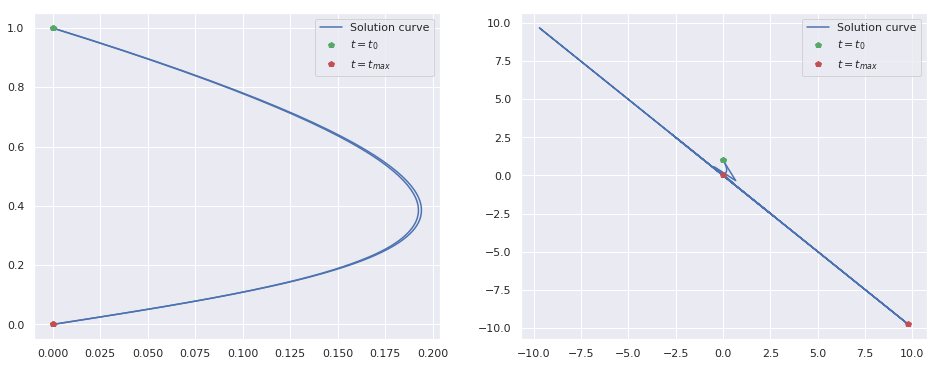

In [346]:
h = 0.01
fig, axes = plt.subplots(1,2, figsize=(16, 6))
plot_lines_2D(axes[0], m1(lambda x: system_of_eq(0, x),  x_start, t_stop, h), prince)
h = 0.67
plot_lines_2D(axes[1], m1(lambda x: system_of_eq(0, x),  x_start, t_stop, h), prince)

### 1.2. Неявный метод Эйлера

Согласно теоретической оценке, метод является строго устойчивым при всех $\tau.$ На практике, метод становится неустойчивым при $\tau=0.67.$ По правилу Рунге, ошибка метода при $\tau=0.01$  составляет 0.0001.

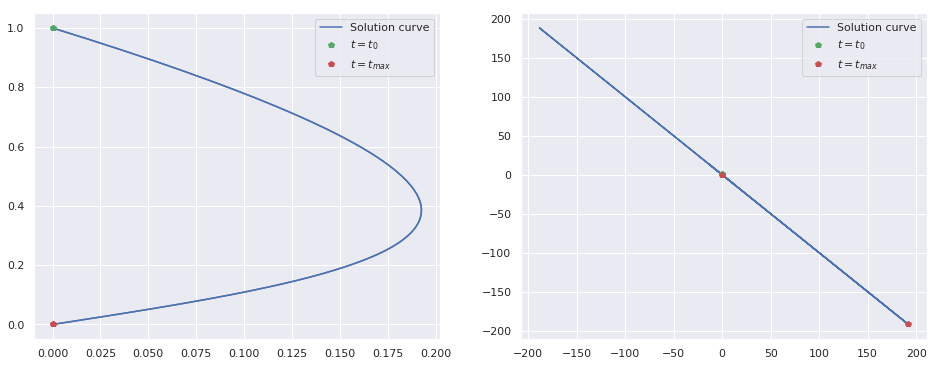

In [347]:
h = 0.01
fig, axes = plt.subplots(1,2, figsize=(16, 6))
plot_lines_2D(axes[0], m2(lambda x: system_of_eq(0, x),  x_start, t_stop, h), prince)
h = 0.67
plot_lines_2D(axes[1], m2(lambda x: system_of_eq(0, x),  x_start, t_stop, h), prince)

На практике, метод становится неустойчивым при $\tau=0.67.$ По правилу Рунге, ошибка метода при $\tau=0.01$  составляет 0.001.

### 1.3. Метод Эйлера с центральной точкой

Согласно теоретической оценке, метод является строго устойчивым при всех $\tau\leqslant0.66.$ На практике, метод становится неустойчивым при $\tau=0.67.$ По правилу Рунге, ошибка метода при $\tau=0.01$  составляет 0.001.

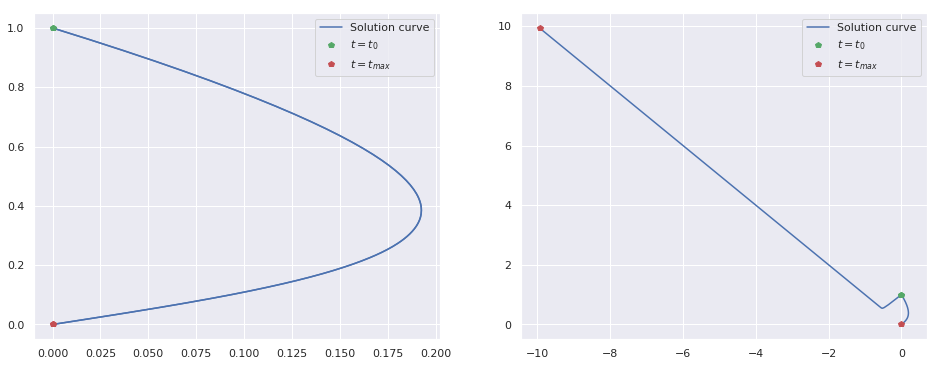

In [348]:
h = 0.01
fig, axes = plt.subplots(1,2, figsize=(16, 6))
plot_lines_2D(axes[0], m3(lambda x: system_of_eq(0, x),  x_start, t_stop, h), prince)
h = 0.67
plot_lines_2D(axes[1], m3(lambda x: system_of_eq(0, x),  x_start, t_stop, h), prince)

### 1.4. Классический метод Рунге (4-й порядок)

Согласно теоретической оценке, метод является строго устойчивым при всех $\tau\leqslant1.06.$ На практике, метод становится неустойчивым при $\tau=1.06.$ По правилу Рунге, ошибка метода при $\tau=0.01$  составляет 0.0001.

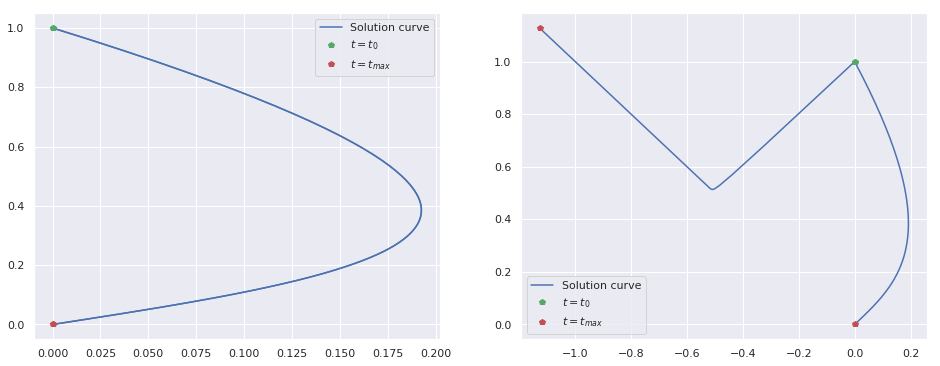

In [349]:
h = 0.01
fig, axes = plt.subplots(1,2, figsize=(16, 6))
plot_lines_2D(axes[0], m4(lambda x: system_of_eq(0, x),  x_start, t_stop, h), prince)
h = 1.05
plot_lines_2D(axes[1], m4(lambda x: system_of_eq(0, x),  x_start, t_stop, h), prince)

## Задание 2. Нелинейная система уравнений


Система ДУ из задания в нужном формате:

In [350]:
# Per aspera ad anum
system_of_eq = lambda b, x: np.array([
    1.0,
    10*x[2]-10*x[1],
    -x[1]*x[3]+28*x[1]-x[2],
    x[1]*x[2]-b*x[3],
])

x_start = np.array([1.0, 1.0, 1.0, 1.0])
t_stop = 151.0
h = 0.001

Решим систему для всех указанных $b$, порядков аппроксимации и построим 45 картинок в различных плоскостях.

In [351]:
B = [1,2,8/3,10,20]
solutions = [(method(lambda x: system_of_eq(b, x),  x_start, t_stop, h), b, method, proj) for method in [adams_2, adams_3, adams_4] for proj in [(0,1,2),(0,1,3),(0,2,3)] for b in B]


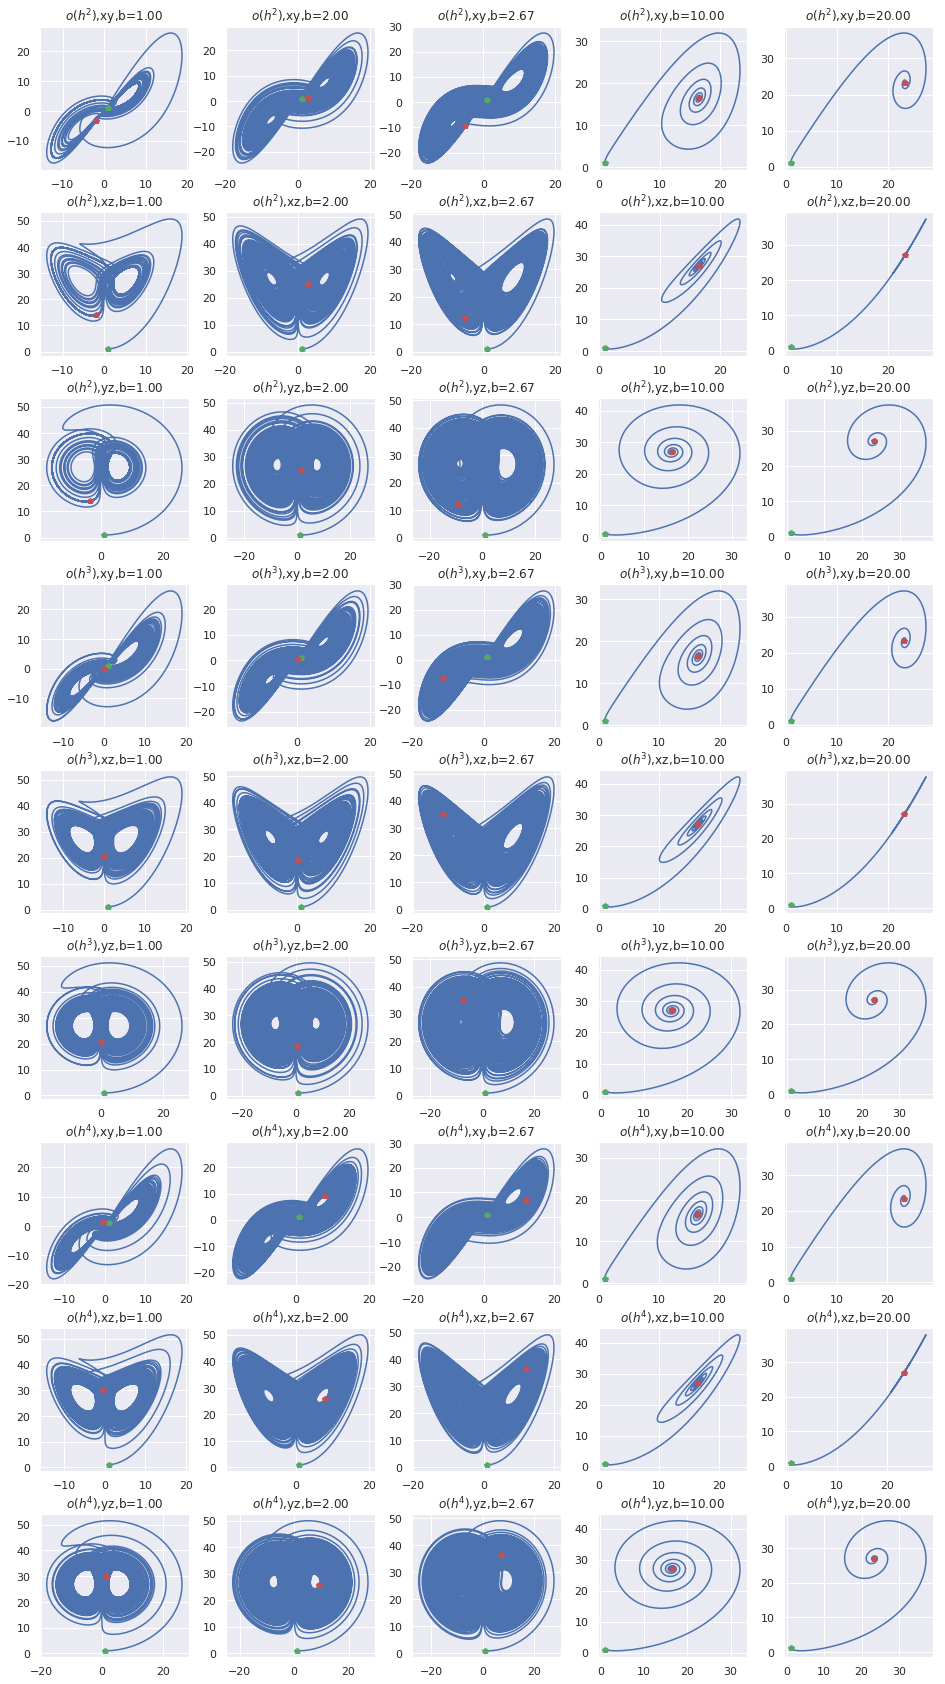

In [352]:
M = {adams_2:'$o(h^2)$', adams_3:'$o(h^3)$', adams_4:'$o(h^4)$'}
P = {(0,1,2):'xy',(0,1,3):'xz',(0,2,3):'yz'}
fig, axes = plt.subplots(9, 5, figsize=(16, 30))
plt.subplots_adjust(wspace=0.25, hspace=0.3)
axes = axes.flatten()
for i in range(0,len(axes)):
    sol, b, method, proj = solutions[i]
    plot_lines_2D(axes[i], sol[proj, :], leg=False)
    axes[i].set_title(M[method]+','+P[proj]+',b={:.2f}'.format(b))

Видим, что при увеличении $b$ происходит слияние двух особых точек в одну. Вне зависимости от порядка апроксимации, решения имеют схожий вид. Посмотрим, как со временем изменяется ошибка между различными порядками апроксимации.

Сравниваем второй и третий метод при $b=10$.

In [353]:
differ = [np.linalg.norm(x1-x2, ord=2) for x1, x2 in np.stack((solutions[3][0].T[:,1:], solutions[18][0].T[:,1:]), axis =1)]

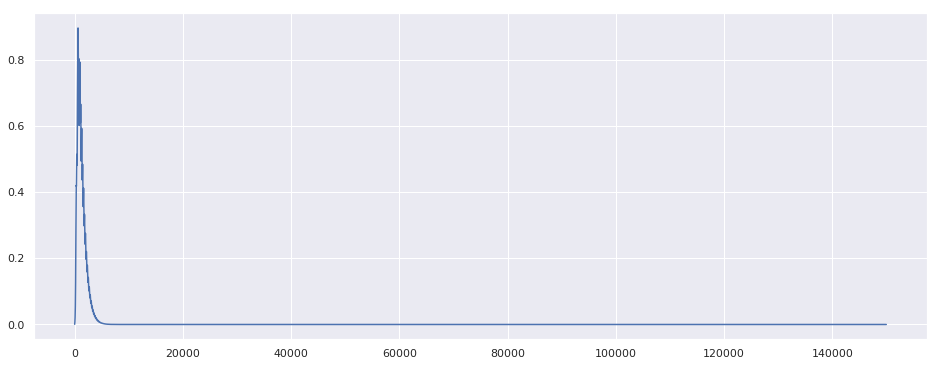

In [354]:
plt.figure(figsize=(16, 6))
plt.plot(differ[10:])
plt.show()

При $b=3/8$.

In [355]:
differ = [np.linalg.norm(x1-x2, ord=2) for x1, x2 in np.stack((solutions[2][0].T[:,1:], solutions[17][0].T[:,1:]), axis =1)]

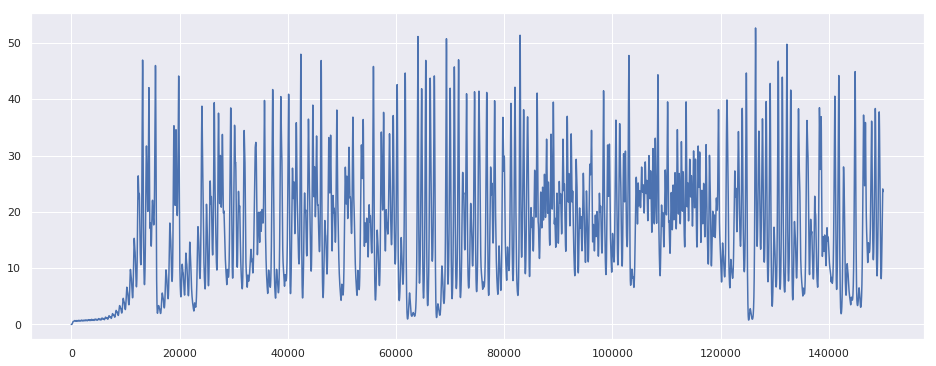

In [356]:
plt.figure(figsize=(16, 6))
plt.plot(differ[10:])
plt.show()

Все полученные методы являются устойчивыми. Но в первом случае решение, вне зависимости от порядка апроксимации устремляется к единственной особой точке, поэтому различие становится равным нулю. Во втором случае решение крутится вокруг двух особенностей, и ошибка располагается вокруг некоторого отличного от нуля среднего.

## Задание 3. Особые точки и особые траектории.

Система уравнений из задания.

In [357]:
system_of_eq = lambda t, x: np.array([
    1.0,
    x[2],
    x[1]**2-1.0
])

t_stop = 101.0
h = 0.1

In [358]:
# Генерация начальных условий
n_points = 100
x1, y1 = np.random.normal(1, 3, n_points),  np.random.normal(0, 3, n_points)
x2, y2 = np.random.normal(-1, 3, n_points),  np.random.normal(0, 3, n_points)
x3, y3 = np.random.normal(1.5, 2, n_points*2),  np.random.normal(-1, 2, n_points*2)
x0 = np.vstack((np.ones(n_points*4), np.hstack((x1, x2, x3)), np.hstack((y1, y2, y3)))).T

In [359]:
# Рунге 1-го порядка
r1 = RungeExplicit(np.array([[0,0],[0,1]]))
# Рунге 4-го порядка
r4 = RungeExplicit(np.array([[0,0,0,0,0],[0.5,0.5,0,0,0],[0.5,0,0.5,0,0],[1,0,0,1,0],[0,1/8,3/8,3/8,1/8]]))

### 3.1. Классический метод Рунге (4-й порядок)
Построим фазовые траектории системы.

In [360]:
solutions = [r4(lambda x: system_of_eq(0, x),  x_s, t_stop, h) for x_s in x0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.


(-3, 3)

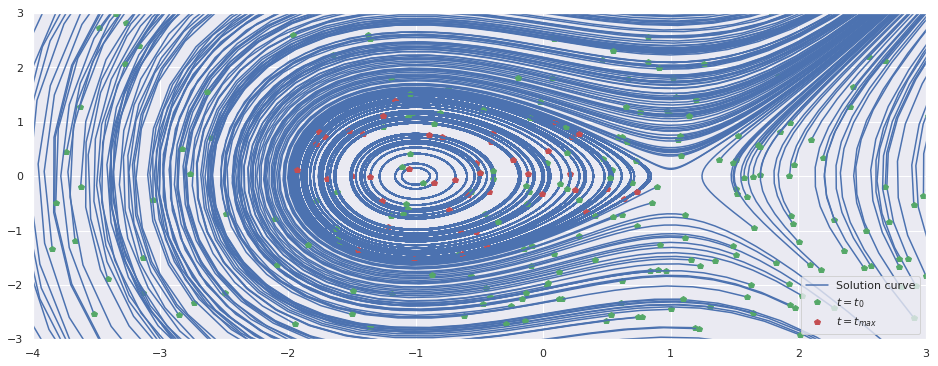

In [361]:
fig, axes = plt.subplots(1, figsize=(16, 6))
plot_lines_2D(axes, *solutions)
axes.set_xlim(-4,3)
axes.set_ylim(-3,3)

### 3.2. Метод Рунге (1-й порядок)

In [362]:
solutions = [r1(lambda x: system_of_eq(0, x),  x_s, t_stop, h) for x_s in x0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.


(-3, 3)

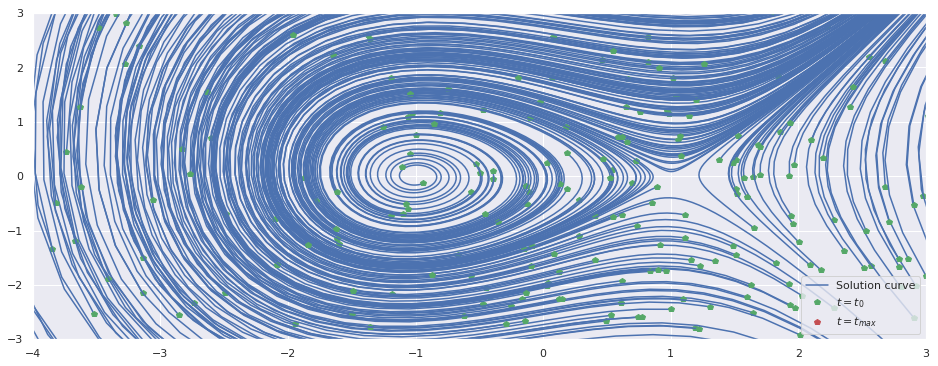

In [363]:
fig, axes = plt.subplots(1, figsize=(16, 6))
plot_lines_2D(axes, *solutions)
axes.set_xlim(-4,3)
axes.set_ylim(-3,3)

При использовании метода Рунге 1-го порядка, полученные решения вокруг особой точки типа центр оказались неустойчивыми. Это объясняется тем, что метод Рунге 1-го порядка (по совместительству явный метод Эйлера) не сохраняет первые интегралы системы - или, если переходить к физическим аналогиям, то не выполняются законы сохранения.